Task 1 - Implement kmeans manually on given toy dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
points = {"x":[2,2,8,5,7,6,1,4],"y":[10,5,4,8,5,4,2,9]}
DF = pd.DataFrame(points)
DF

,x,y
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5
5,6,4
6,1,2
7,4,9


In [ ]:
Centroids = {"x":[2,5,1],"y":[10,8,2]}
Centroids = pd.DataFrame(Centroids)

In [ ]:
Centroids

,x,y
0,2,10
1,5,8
2,1,2


Centroid cordinates
   x   y
0  2  10
1  5   8
2  1   2


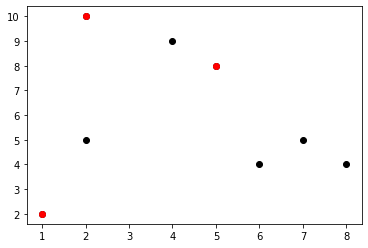

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(points["x"],points["y"],c='black')
plt.scatter(Centroids["x"],Centroids["y"],c='red')
print("Centroid cordinates")
print(Centroids)
plt.show()

Difference between sum of cordinates of new centroids and old centroids
0.25


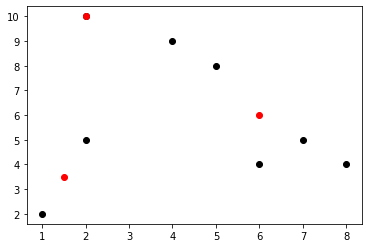

Centroids cordinates
           x     y
Cluster           
0        2.0  10.0
1        6.0   6.0
2        1.5   3.5
point belonging to centroid
   x   y  Cluster
0  2  10        0
1  2   5        2
2  8   4        1
3  5   8        1
4  7   5        1
5  6   4        1
6  1   2        2
7  4   9        0
Difference between sum of cordinates of new centroids and old centroids
-0.25000000000000044


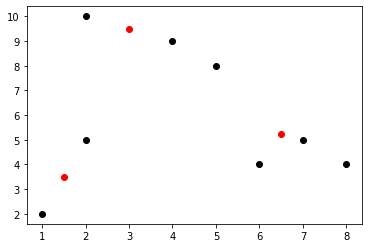

Centroids cordinates
           x     y
Cluster           
0        3.0  9.50
1        6.5  5.25
2        1.5  3.50
point belonging to centroid
   x   y  Cluster
0  2  10        0
1  2   5        2
2  8   4        1
3  5   8        0
4  7   5        1
5  6   4        1
6  1   2        2
7  4   9        0
Difference between sum of cordinates of new centroids and old centroids
0.0


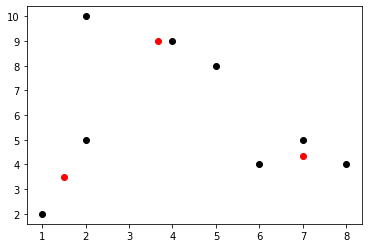

Centroids cordinates
                x         y
Cluster                    
0        3.666667  9.000000
1        7.000000  4.333333
2        1.500000  3.500000
point belonging to centroid
   x   y  Cluster
0  2  10        0
1  2   5        2
2  8   4        1
3  5   8        0
4  7   5        1
5  6   4        1
6  1   2        2
7  4   9        0


In [ ]:
from math import sqrt
diff = 1
count = 0
j=0
XD=DF
temp = DF
while(diff!=0 and count<=5):
    i=0
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            point1_x=row_c["x"]
            point1_y=row_c["y"]
            point2_x=row_d["x"]
            point2_y =row_d["y"]
            d = sqrt((point1_x-point2_x)**2 + (point1_y - point2_y)**2)
            ED.append(d)
        temp[i]=ED
        i=i+1
    C=[]
    K=3
    for index,row in temp.iterrows():
        min_dist=row[0]
        pos=0
        for i in range(K-1):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    temp["Cluster"]=C
    Centroids_new = temp.groupby(["Cluster"]).mean()[["x","y"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['x'] - Centroids['x']).sum() + (Centroids_new['y'] - Centroids['y']).sum()
        print("Difference between sum of cordinates of new centroids and old centroids")
        print(diff.sum())
        plt.scatter(points["x"],points["y"],c='black')
        plt.scatter(Centroids["x"],Centroids["y"],c='red')
        plt.show()
        print("Centroids cordinates")
        print(Centroids)
        print("point belonging to centroid")
        print(temp[["x","y","Cluster"]])
        count +=1
    Centroids = temp.groupby(["Cluster"]).mean()[["x","y"]]

Task 2 - Implement k means on Real world dataset using scikit learn implementation

In [1]:
from google.colab import files
upload = files.upload()

Saving credit card.csv to credit card.csv


In [ ]:
# https://www.kaggle.com/arjunbhasin2013/ccdata
import pandas as pd
data = pd.read_csv("credit card.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Observation about dataset - 

1. Customer_id is unique for each datapoint, so it will not contribute to the clustering, so will drop that.
2. MINIMUM_PAYMENTS and CREDIT_LIMIT column contains null values
3. Mean and Median values of columns are different, so they are skewed

## Data cleaning

Dropping CUST_ID column

In [ ]:
preprocessed_data = data.drop(["CUST_ID"],axis=1)

As there is only one row in CREDIT_LIMIT having null value, dropping that row

In [ ]:
preprocessed_data[preprocessed_data["CREDIT_LIMIT"].isna()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [ ]:
preprocessed_data.dropna(subset=["CREDIT_LIMIT"],inplace=True)

Imputating missing value in MINIMUM_PAYMENTS column with median values

In [ ]:
preprocessed_data['MINIMUM_PAYMENTS'].fillna(preprocessed_data['MINIMUM_PAYMENTS'].median(), inplace=True)

Standardzing the data

In [ ]:
preprocessed_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
data = preprocessed_data
preprocessed_data = StandardScaler().fit_transform(preprocessed_data)

Choosing optimal value of K

Elbow method

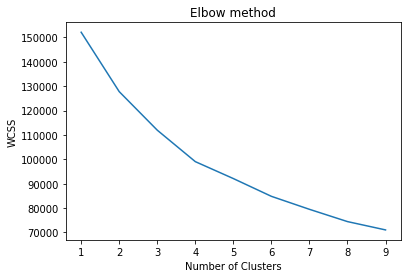

In [ ]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(preprocessed_data) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

4 Seems to have good k value

silhouette score

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

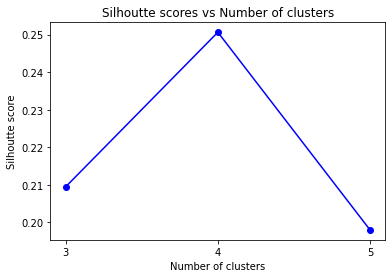

In [ ]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(preprocessed_data, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(3,6), silhoutte_scores, "bo-")
plt.xticks([3, 4, 5])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()


K=4 has highest silhoutte score, so we will select k=4

K means with random centroid intialization

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4,init="random",n_init=10).fit(preprocessed_data)
print('Silhoutte score of our model is ' + str(silhouette_score(preprocessed_data, kmeans.labels_)))

Silhoutte score of our model is 0.19766936752275144


In [ ]:
data["kmean_label"] = kmeans.labels_

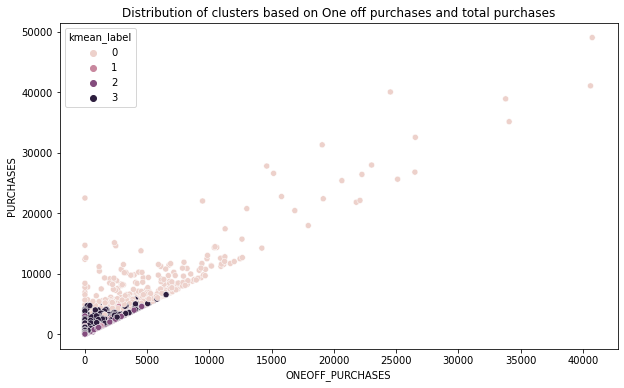

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='ONEOFF_PURCHASES', y='PURCHASES', hue='kmean_label')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

Kmeans with kmeans++ intialization

In [ ]:
kmeansplus = KMeans(n_clusters=4,init="k-means++",n_init=10).fit(preprocessed_data)
print('Silhoutte score of our model is ' + str(silhouette_score(preprocessed_data, kmeansplus.labels_)))

Silhoutte score of our model is 0.19766936752275144


In [ ]:
data["kmeanplus_label"] = kmeansplus.labels_

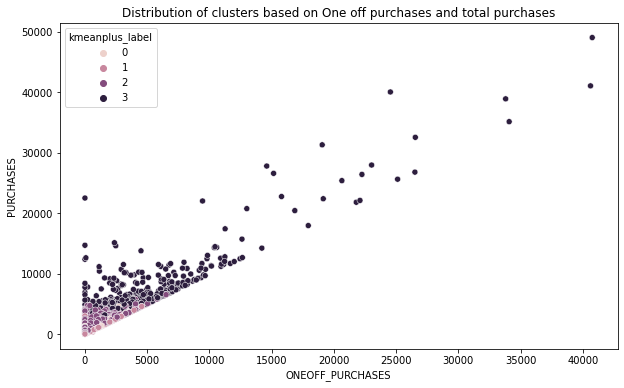

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='ONEOFF_PURCHASES', y='PURCHASES', hue='kmeanplus_label')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

## Observations - 

1. cluster formation depends a lot on intialization of points
2. k means++ peform slightly better than k means
3. It is very diffcuilt to choose optimal value for k